In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Accidents et victimes par année


In [ ]:
# liste du répertoire
!ls "/content/drive/MyDrive/Accidents/datas/Regroupement"

drive = True
path = "/content/drive/MyDrive/Accidents/"
pathData = "/content/drive/MyDrive/Accidents/datas/"
pathDataRegroupement = "/content/drive/MyDrive/Accidents/datas/Regroupement/"

Accidents_2005_to_2023.csv		 Caracteristiques_lieux_Usagers_2005_to_2023.csv
caracteristiques_2005_to_2023.csv	 Caracteristiques_Usagers_2005_to_2023.csv
caracteristiques_2005_to_2023_step1.csv  lieux_2005_to_2023.csv
caracteristiques_2005_to_2023_step2.csv  usagers_2005_to_2023.csv
Caracteristiques_lieux_2005_to_2023.csv  vehicules_2005_to_2023.csv


In [ ]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
#from xplotter.insights import *

sns.set_style('whitegrid')

# pour ne pas imprimer les warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Chargement du Dataset complet
Accidents_2005_to_2023 = pd.read_csv(pathDataRegroupement + 'Caracteristiques_Usagers_2005_to_2023.csv', sep=',',low_memory=False)

Caracteristiques_2005_to_2023 = pd.read_csv(pathDataRegroupement + 'Caracteristiques_Usagers_2005_to_2023.csv', sep=',',low_memory=False)

In [ ]:
Accidents_2005_to_2023.shape

(2659672, 33)

In [ ]:
Accidents_2005_to_2023.grav.unique()

array([ 4,  1,  3,  2, -1])

In [ ]:
Accidents_2005_to_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2659672 entries, 0 to 2659671
Data columns (total 33 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Num_Acc         int64  
 1   jour            int64  
 2   mois            int64  
 3   an              int64  
 4   hrmn            object 
 5   lum             int64  
 6   dep             float64
 7   com             object 
 8   agg             int64  
 9   int             int64  
 10  atm             float64
 11  col             float64
 12  adr             object 
 13  lat             object 
 14  long            object 
 15  gps             object 
 16  com_insee_temp  object 
 17  com_insee       object 
 18  place           float64
 19  catu            int64  
 20  grav            int64  
 21  sexe            int64  
 22  trajet          float64
 23  secu            float64
 24  locp            float64
 25  actp            object 
 26  etatp           float64
 27  an_nais         float64
 28  num_veh     

In [ ]:
df_count_par_accident=pd.DataFrame({'Count': Accidents_2005_to_2023["an"].value_counts().sort_index(ascending=True)})
df_count_par_accident.head(40)

,Count
an,
2005,191440
2006,180668
2007,182325
2008,165664
2009,161023
2010,149449
2011,144036
2012,134505
2013,125074


In [ ]:
#Personnes blessés
Accidents_2005_to_2023_Blesses = Accidents_2005_to_2023[(Accidents_2005_to_2023["grav"]==2) | (Accidents_2005_to_2023["grav"]==3) ]
# Personnes tués
Accidents_2005_to_2023_Tues = Accidents_2005_to_2023[(Accidents_2005_to_2023["grav"]==4)]

In [ ]:
Accidents_2005_to_2023_Blesses.grav.unique()

array([3, 2])

In [ ]:
Accidents_2005_to_2023_Tues.grav.unique()

array([4])

In [ ]:
df_count_par_blesses=pd.DataFrame({'Count': Accidents_2005_to_2023_Blesses["an"].value_counts().sort_index(ascending=True)})
df_count_par_blesses.head(40)

,Count
an,
2005,45129
2006,45371
2007,43235
2008,39240
2009,37596
2010,34385
2011,33642
2012,30795
2013,29234


In [ ]:
df_count_par_tues=pd.DataFrame({'Count': Accidents_2005_to_2023_Tues["an"].value_counts().sort_index(ascending=True)})
df_count_par_tues.head(40)

,Count
an,
2005,68265
2006,61463
2007,64586
2008,58833
2009,57611
2010,54068
2011,51572
2012,48709
2013,44641


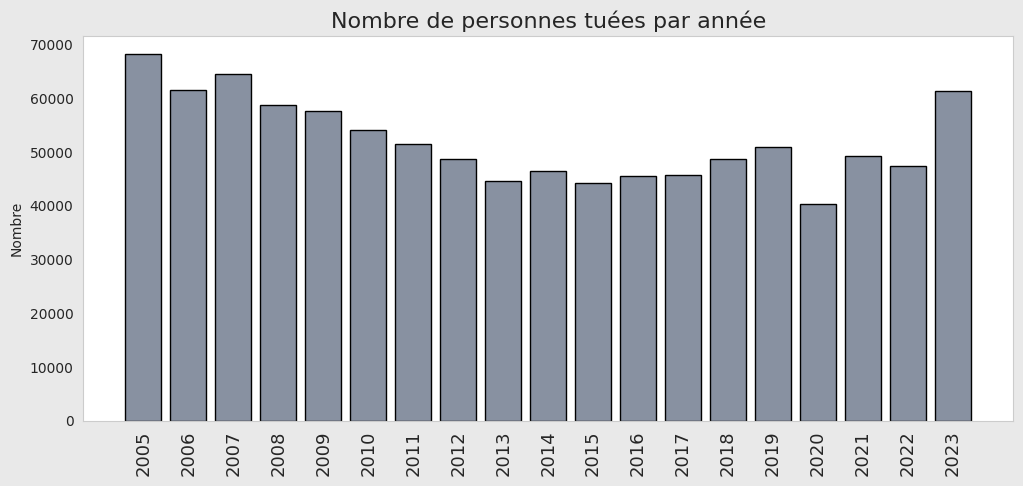

In [ ]:
label=list(df_count_par_tues.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre de personnes tuées par année",size=16)
plt.bar(range(0,len(label)),df_count_par_tues["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

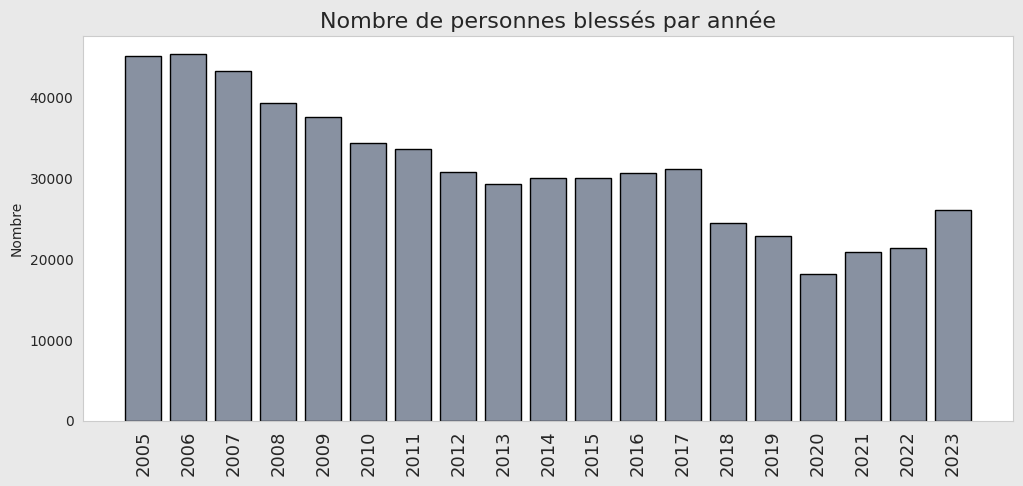

In [ ]:
label=list(df_count_par_blesses.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre de personnes blessés par année",size=16)
plt.bar(range(0,len(label)),df_count_par_blesses["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

In [ ]:
Accidents_2005_to_2023['dep'] = Accidents_2005_to_2023['dep'].astype(int)

Nombre d'accidents en Seine Maritime

In [ ]:
#Personnes blessés
Accidents_2005_to_2023_Blesses_departement_76 = Accidents_2005_to_2023[((Accidents_2005_to_2023["grav"]==2) | (Accidents_2005_to_2023["grav"]==3)) & (Accidents_2005_to_2023["dep"]==76) ]
# Personnes tués
Accidents_2005_to_2023_Tues_departement_76 = Accidents_2005_to_2023[(Accidents_2005_to_2023["grav"]==4)  & (Accidents_2005_to_2023["dep"]== 76) ]

In [ ]:
Accidents_2005_to_2023_Tues_departement_76.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,secu,locp,actp,etatp,an_nais,num_veh,id_usager,id_vehicule,secu2,secu3
259,202300000110,28,3,2023,16:30,1,76,76231,2,2,...,0.0,2.0,3,2.0,2016.0,A01,NaN,NaN,NaN,NaN
262,202300000110,28,3,2023,16:30,1,76,76231,2,2,...,0.0,2.0,3,2.0,2016.0,A01,NaN,NaN,NaN,NaN
538,202300000214,25,3,2023,13:45,1,76,76351,2,1,...,1.0,-1.0,-1,-1.0,1975.0,B01,NaN,NaN,NaN,NaN
686,202300000267,29,11,2023,13:15,1,76,76575,2,1,...,8.0,-1.0,-1,-1.0,2004.0,A01,NaN,NaN,NaN,NaN
687,202300000267,29,11,2023,13:15,1,76,76575,2,1,...,8.0,-1.0,-1,-1.0,2004.0,A01,NaN,NaN,NaN,NaN


In [ ]:
Accidents_2005_to_2023_Blesses_departement_76.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,secu,locp,actp,etatp,an_nais,num_veh,id_usager,id_vehicule,secu2,secu3
1260,202300000470,9,6,2023,06:35,1,76,76341,2,4,...,2.0,-1.0,-1,-1.0,1982.0,A01,NaN,NaN,NaN,NaN
1261,202300000470,9,6,2023,06:35,1,76,76341,2,4,...,2.0,-1.0,-1,-1.0,1984.0,A01,NaN,NaN,NaN,NaN
1263,202300000470,9,6,2023,06:35,1,76,76341,2,4,...,2.0,-1.0,-1,-1.0,1982.0,A01,NaN,NaN,NaN,NaN
1264,202300000470,9,6,2023,06:35,1,76,76341,2,4,...,2.0,-1.0,-1,-1.0,1984.0,A01,NaN,NaN,NaN,NaN
1265,202300000471,8,6,2023,14:20,1,76,76447,2,1,...,2.0,-1.0,-1,-1.0,1954.0,A01,NaN,NaN,NaN,NaN


In [ ]:
Accidents_2005_to_2023.dep.unique()

array([75, 94, 95, 93, 92,  1, 38, 91, 22,  6, 67, 56, 20, 82, 11, 63, 47,
       39, 29, 26, 60, 45, 64, 16,  7, 17, 23, 87, 30, 34, 62, 66, 83, 69,
       33, 80, 13, 78, 76, 74, 71, 72, 61, 86, 70, 65, 44, 54, 53, 59, 85,
       57, 28, 37, 52, 51, 49, 88, 10, 36, 35, 31, 27, 84, 21,  8,  2, 81,
       77, 14, 50, 42,  9, 15, 73, 32,  4, 58, 68, 55, 41, 43, 25,  5, 12,
       19, 79, 40, 18,  3, 46, 90, 24, 89, 48])

In [ ]:
Accidents_2005_to_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696025 entries, 0 to 2696024
Data columns (total 51 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Num_Acc         int64  
 1   jour            int64  
 2   mois            int64  
 3   an              int64  
 4   hrmn            object 
 5   lum             int64  
 6   dep             float64
 7   com             object 
 8   agg             int64  
 9   int             int64  
 10  atm             float64
 11  col             float64
 12  adr             object 
 13  lat             object 
 14  long            object 
 15  gps             object 
 16  com_insee_temp  object 
 17  com_insee       object 
 18  catr            float64
 19  voie            object 
 20  v1              float64
 21  v2              object 
 22  circ            float64
 23  nbv             object 
 24  vosp            float64
 25  prof            float64
 26  pr              object 
 27  pr1             object 
 28  plan        

In [ ]:
df_count_par_blesses_76=pd.DataFrame({'Count': Accidents_2005_to_2023_Blesses_departement_76["an"].value_counts().sort_index(ascending=True)})
df_count_par_blesses_76.head(40)

,Count
an,
2005,716
2006,771
2007,751
2008,749
2009,696
2010,583
2011,544
2012,499
2013,461


In [ ]:
df_count_par_tues_76=pd.DataFrame({'Count': Accidents_2005_to_2023_Tues_departement_76["an"].value_counts().sort_index(ascending=True)})
df_count_par_tues_76.head(40)

,Count
an,
2005,718
2006,640
2007,629
2008,787
2009,776
2010,619
2011,641
2012,585
2013,546


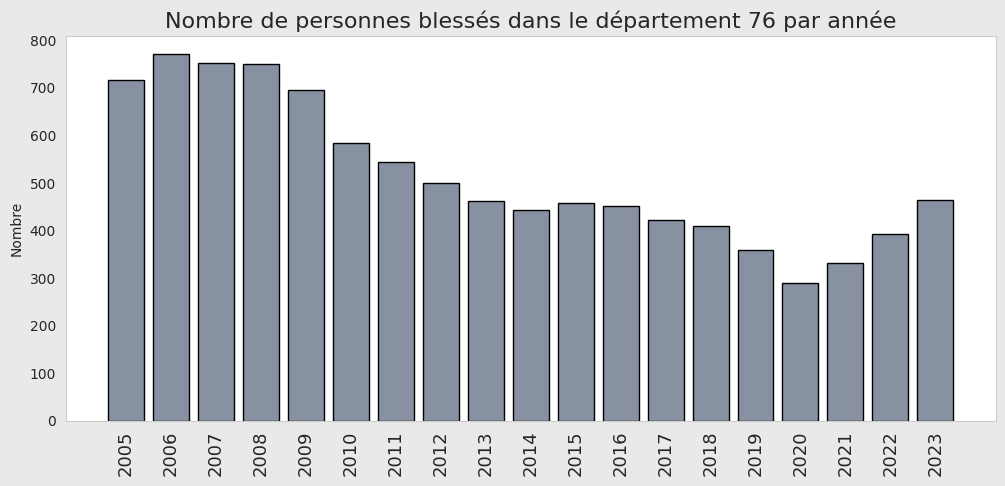

In [ ]:
label=list(df_count_par_blesses_76.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre de personnes blessés dans le département 76 par année",size=16)
plt.bar(range(0,len(label)),df_count_par_blesses_76["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

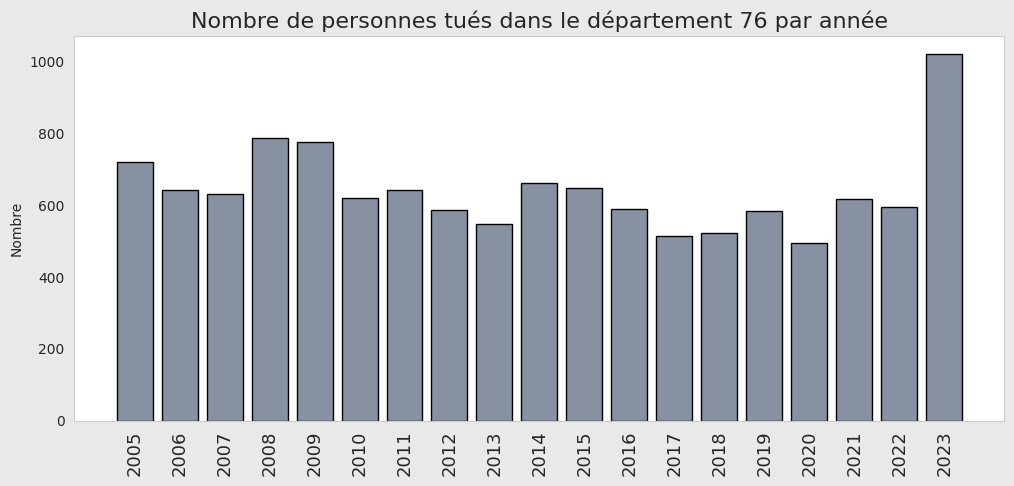

In [ ]:
label=list(df_count_par_tues_76.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre de personnes tués dans le département 76 par année",size=16)
plt.bar(range(0,len(label)),df_count_par_tues_76["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()